In [1]:
# Content
# This compiled dataset pulled from four other datasets linked by time and place, and was built to find signals correlated to increased suicide rates among different cohorts globally, across the socio-economic spectrum.

# References
# United Nations Development Program. (2018). Human development index (HDI). Retrieved from http://hdr.undp.org/en/indicators/137506

# World Bank. (2018). World development indicators: GDP (current US$) by country:1985 to 2016. Retrieved from http://databank.worldbank.org/data/source/world-development-indicators#

# [Szamil]. (2017). Suicide in the Twenty-First Century [dataset]. Retrieved from https://www.kaggle.com/szamil/suicide-in-the-twenty-first-century/notebook

# World Health Organization. (2018). Suicide prevention. Retrieved from http://www.who.int/mental_health/suicide-prevention/en/

# Inspiration
# Suicide Prevention.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
PATH = "suicide_rate.csv"
df = pd.read_csv(PATH)

In [4]:
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [5]:
# df["HDI for year"].unique()
# df["HDI for year"].value_counts(dropna=False)
# I will drop "HDI for year" since 2/3 data is missing it is not going to be usefull to 
# make analysis on the data

In [6]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [7]:
## TO-DO:
#     1.Rename [gdp_for_year ($)]= [GDP for year], [gdp_per_capita] = [GDP per capita]
#     2.Add Currency column set to "USD"
#     3.Drop [HDI for year] and [country-year] columns
#     4.Write some Definition on Generations

In [8]:
#  make sure you call this column only once
# beacuse you are dropping values it will throw an error 
def cleaning_renaming_columns(df):
    df.rename(columns={" gdp_for_year ($)":"gdp for year", "gdp_per_capita ($)":"gdp per capita", "suicides_no":"suicides"}, inplace = True)
    df["currency of gdp"] = "USD"
    df.drop(columns=["HDI for year", "country-year"], inplace=True)
    return df

In [9]:
df = cleaning_renaming_columns(df)

In [10]:
df["generation"].value_counts(dropna=False)

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

In [11]:
df.head()

,country,year,sex,age,suicides,population,suicides/100k pop,gdp_for_year ($),gdp per capita,generation,currency of gdp
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,156,624,900",796,Generation X,USD
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,156,624,900",796,Silent,USD
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,156,624,900",796,Generation X,USD
3,Albania,1987,male,75+ years,1,21800,4.59,"2,156,624,900",796,G.I. Generation,USD
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,156,624,900",796,Boomers,USD


In [15]:
df["year"].unique()

array([1987, 1988, 1989, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       1985, 1986, 1990, 1991, 2012, 2013, 2014, 2015, 2011, 2016])

# Visualization

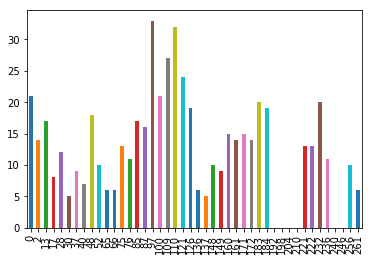

In [25]:
# ["suicides"].plot(kind="bar")

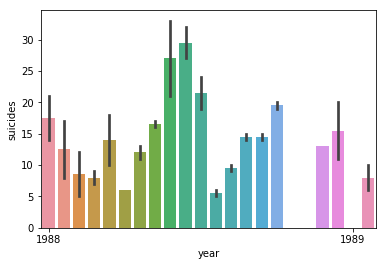

In [32]:
sns.barplot(x='year', y='suicides', data=df[(df["country"] == "Albania") & (df["age"] == "15-24 years")])
import matplotlib.ticker as ticker
ax = plt.gca()
# ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
ax.xaxis.set_major_locator(ticker.MultipleLocator(base=20))
plt.show()

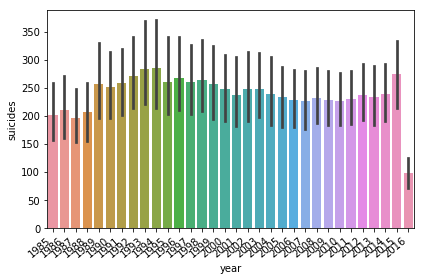

In [36]:
ax = sns.barplot(x="year", y="suicides", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

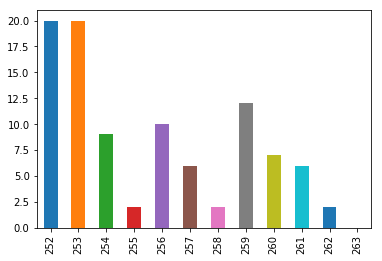

In [51]:
df[(df["country"]== "Albania") & (df["year"]==2010)]["suicides"].plot(kind="bar")